# Head

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('clustering/')

from utils import *

# Load `cluster_df.parquet`

In [3]:
import pandas as pd
cluster_df = pd.read_parquet(os.path.join(get_data_dir(), '2010s', 'cluster_df.parquet'))

data_dir:  /home/lyuzhuoqi/projects/clustering/data


In [6]:
MAG_venue_df = pd.read_parquet(os.path.join(get_data_dir(), 'MAG_venue.parquet'))

data_dir:  /home/lyuzhuoqi/projects/clustering/data


In [7]:
MAG_venue_df

,VenueType,OriginalVenue
VID,,
3006142753,Journal,Proceedings of The Royal Society of London
194691280,Journal,Annalen der Physik
177993953,Journal,Journal of Literacy Research
168309380,Journal,Philosophical Magazine
93133213,Journal,Western Journal of Communication
...,...,...
938070683,Journal,Corporate Philanthropy Report
946020915,Journal,Africa Research Bulletin
6224198,Journal,Loisir & Societe-society and Leisure


In [8]:
cluster_df = cluster_df.merge(MAG_venue_df, left_index=True, right_index=True)

In [14]:
cluster_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,VenueType,OriginalVenue
VID,,,,,,,,,,,,,,
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,14,Journal,PLOS ONE
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,1,Journal,Nature
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,25,Journal,Proceedings of the National Academy of Science...
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,1,Journal,Science
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,25,Journal,Journal of the American Chemical Society
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,Journal,The internet journal of the third world medicine
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,Journal,Publications of The English Goethe Society
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,Journal,Peritia


In [15]:
cluster_df.drop(columns=['VenueType'], inplace=True)

In [16]:
import pickle
with open(os.path.join(get_data_dir(), "2010s", 'wv'), 'rb') as f:
    wv = pickle.load(f)
all_VIDs = wv.index_to_key
valid_VID_idx = [all_VIDs.index(vid) for vid in cluster_df.index]
valid_VID_idx

data_dir:  /home/lyuzhuoqi/projects/clustering/data


/home/lyuzhuoqi/miniconda3/envs/p2v/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 19

In [20]:
with open(os.path.join(get_data_dir(), "2010s", 'cluster_posterior_soft_movMF.pkl'), 'rb') as f:
    posterior = pickle.load(f)
posterior.shape

data_dir:  /home/lyuzhuoqi/projects/clustering/data


(26, 37594)

In [23]:
cluster_df['soft_movMF_posterior'] = list(posterior.T[valid_VID_idx])

In [25]:
from scipy.stats import entropy

cluster_df['soft_movMF_entropy'] = cluster_df['soft_movMF_posterior'].apply(lambda x: entropy(x))
cluster_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,OriginalVenue,soft_movMF_posterior,soft_movMF_entropy
VID,,,,,,,,,,,,,,,
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,14,PLOS ONE,"[0.0016869537863995355, 1.1879276590460386e-11...",8.908842e-02
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,1,Nature,"[3.219941214364767e-07, 9.134549828203833e-19,...",9.951831e-03
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,25,Proceedings of the National Academy of Science...,"[3.7027736002678795e-09, 1.3146624938971587e-1...",1.036340e-04
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,1,Science,"[8.234788647495135e-08, 4.072790476962324e-12,...",2.909174e-01
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,25,Journal of the American Chemical Society,"[7.333632254330435e-25, 1.2534400036673234e-35...",2.250059e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,The internet journal of the third world medicine,"[0.565788384990394, 9.823987003257533e-17, 6.4...",6.844658e-01
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,Publications of The English Goethe Society,"[1.2961889515540408e-41, 3.0171793322906754e-3...",5.399117e-20
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,Peritia,"[1.5908123432317827e-31, 3.819372714879571e-26...",6.532773e-13


In [46]:
cluster_df = cluster_df[~cluster_df['OriginalVenue'].isin(corrupted_venue_name_list)]

<Axes: ylabel='Frequency'>

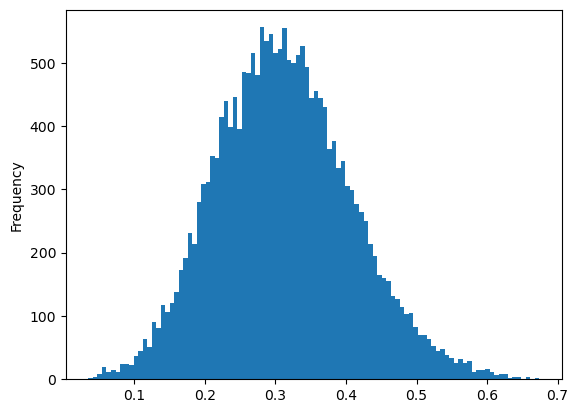

In [56]:
cluster_df['movMF_distance'].plot.hist(bins=100)

In [47]:
cluster_df.sort_values(by='movMF_distance', ascending=False).head(20)['OriginalVenue'].values

array(['Image Analysis & Stereology',
       'Biographical Memoirs of Fellows of the Royal Society',
       'Journal of The Korean Chemical Society', 'IEEE Pulse',
       'Synthesiology English edition', 'Drug Delivery System',
       'Interface Focus', 'Radiation Protection Dosimetry',
       'Mathematical Biology and Bioinformatics', 'Bioelectromagnetics',
       'Health Physics', 'National Science Review',
       'Journal of the Royal Society Interface',
       'Lighting Research & Technology', 'HardwareX',
       'Life sciences in space research',
       'Journal of Radiological Protection', 'REACH',
       'Health Risk Analysis', 'Drug Testing and Analysis'], dtype=object)

In [78]:
cluster_df.sort_values(by='movMF_distance').head(20)['OriginalVenue'].values

array(['Publications of The English Goethe Society',
       'Zeitschrift Fur Kunstgeschichte', 'Studi Francesi',
       'European Journal of Jewish Studies',
       'American Studies in Scandinavia', 'Journal of Romance Studies',
       'Walt Whitman Quarterly Review',
       'Explorations in Renaissance Culture',
       'Chasqui-revista De Literatura Latinoamericana',
       'International Journal of The Classical Tradition',
       'Jewish culture and history', 'Archaeologia Baltica',
       'Chicago Review', 'Australian Literary Studies',
       'Revue Archeologique', 'Chinese Studies in History',
       'Cahiers De Civilisation Medievale',
       'Journal of Egyptian Archaeology',
       'Modern Judaism - A Journal of Jewish Ideas and Experience',
       "Revue d'Histoire littéraire de la France"], dtype=object)

<Axes: ylabel='Frequency'>

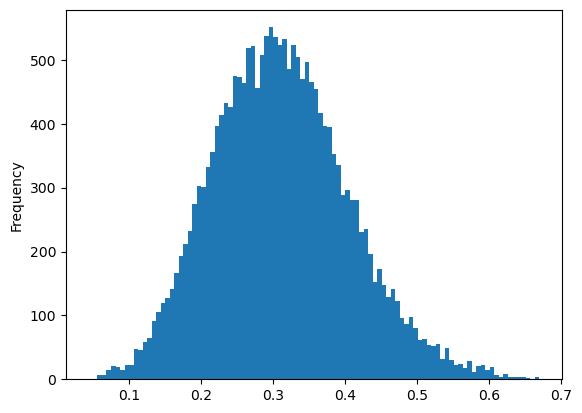

In [57]:
cluster_df['skm_distance'].plot.hist(bins=100)

In [48]:
cluster_df.sort_values(by='skm_distance', ascending=False).head(20)['OriginalVenue'].values

array(['Drug Delivery System',
       'Biographical Memoirs of Fellows of the Royal Society',
       'Image Analysis & Stereology', 'IEEE Pulse',
       'Synthesiology English edition', 'Science & Justice',
       'Australian Journal of Forensic Sciences',
       'Radiation Protection Dosimetry',
       'Journal of The Korean Chemical Society', 'REACH',
       'Wiley Interdisciplinary Reviews: Computational Statistics',
       'Interface Focus', 'National Science Review',
       'Journal of the Royal Society Interface',
       'Mathematical Biology and Bioinformatics',
       'Journal of Breath Research', 'Forensic Science International',
       'Health Risk Analysis',
       'Journal of the Canadian Society of Forensic Science', 'HardwareX'],
      dtype=object)

<Axes: ylabel='Frequency'>

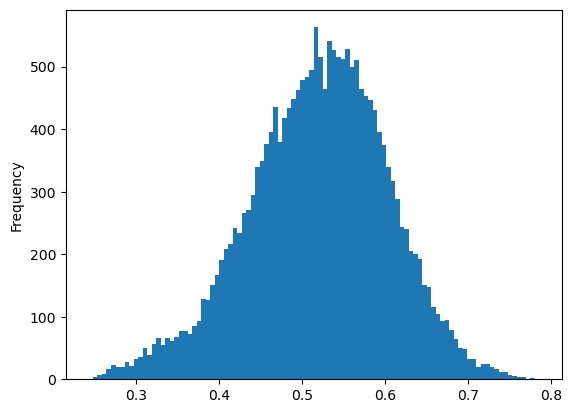

In [58]:
cluster_df['kmeans_distance'].plot.hist(bins=100)

In [49]:
cluster_df.sort_values(by='kmeans_distance', ascending=False).head(20)['OriginalVenue'].values

array(['Drug Delivery System',
       'Biographical Memoirs of Fellows of the Royal Society',
       'Drug Testing and Analysis', 'Health Risk Analysis', 'IEEE Pulse',
       'Journal of The Korean Chemical Society',
       'Image Analysis & Stereology', 'Life sciences in space research',
       'Radiation Protection Dosimetry', 'Journal of Biorheology',
       'Lighting Research & Technology',
       'Mathematical Biology and Bioinformatics', 'Radioisotopes',
       'Synthesiology English edition', 'Health Physics',
       'Journal of Breath Research',
       'Concepts in Magnetic Resonance Part A',
       'Australian Journal of Forensic Sciences',
       'National Science Review', 'REACH'], dtype=object)

(0.0, 0.1)

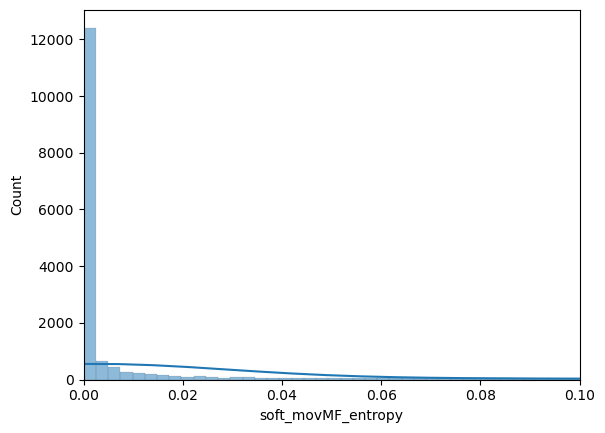

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(cluster_df['soft_movMF_entropy'], kde=True)
plt.xlim(0, 0.1)

In [50]:
cluster_df.sort_values(by='soft_movMF_entropy', ascending=False).head(20)['OriginalVenue'].values

array(['ACM Transactions on Mathematical Software', 'Open Mind',
       'Journal of The Korean Chemical Society',
       'Journal of medical signals and sensors',
       'Integrative Cancer Therapies',
       'Action Learning: Research and Practice',
       'Journal of Experimental Psychology: Learning, Memory and Cognition',
       'Journal of Korea Society for Plants People and Environment',
       'Journal of Transport and Land Use',
       'Therapeutic Advances in Psychopharmacology',
       'Journal of Interior Design', 'Leprosy Review',
       'European Journal of Mass Spectrometry',
       'Statistics in Biosciences',
       'Journal of Automation and Information Sciences', 'Library Review',
       'Theoretical Biology and Medical Modelling',
       'African Vision and Eye Health',
       'IEEE Journal of Translational Engineering in Health and Medicine',
       'Calidoscopio'], dtype=object)

In [32]:
cluster_df['soft_movMF_entropy'].values

array([8.90884236e-02, 9.95183081e-03, 1.03634032e-04, ...,
       6.53277306e-13, 6.84727211e-02, 9.73423456e-11])

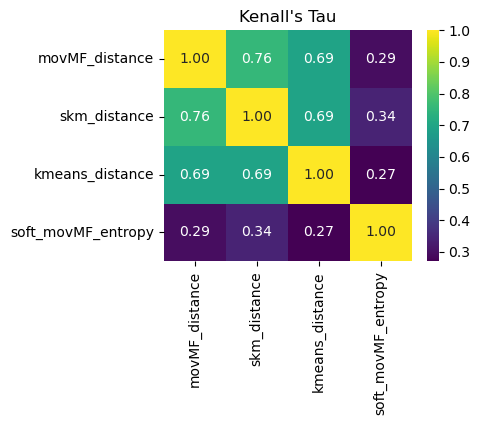

In [42]:
import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = [cluster_df['movMF_distance'].values, 
           cluster_df['skm_distance'].values, 
           cluster_df['kmeans_distance'].values, 
           cluster_df['soft_movMF_entropy'].values]
labels = ['movMF_distance', 
          'skm_distance', 
          'kmeans_distance',
          'soft_movMF_entropy']

n = len(metrics)
kendall_matrix = np.zeros((n, n))

# 计算每对排序的 Kendall's Tau 相关性
for i in range(n):
    for j in range(n):
        if i != j:  # 排除对角线元素（自相关）
            tau, _ = kendalltau(metrics[i], metrics[j])
            kendall_matrix[i, j] = tau
        else:
            kendall_matrix[i, j] = 1.0  # 自相关设置为1

# 将矩阵转化为 Pandas DataFrame 以便可视化
kendall_df = pd.DataFrame(kendall_matrix, columns=labels, index=labels)

# 绘制热图
plt.figure(figsize=(4, 3))
sns.heatmap(kendall_df, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Kenall's Tau")
plt.show()